# Análise Exploratória inicial dos Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Upload do ficheiro

In [2]:
data_path = r'C:\Users\catarina.miranda\PycharmProjects\FicheiroCompras_ML\data\raw\JE_Valérius_Sede_Compras_2024.xlsx'

data = pd.read_excel(data_path)
print('Ficheiro lido')

Ficheiro lido


In [17]:
# Info geral do dataset
print(f'Shape: {data.shape}')
print(f'Linhas: {data.shape[0]}')
print(f'Colunas: {data.shape[1]}')

Shape: (18213, 23)
Rows: 18213
Columns: 23


In [19]:
# Nome das colunas
for i, col in enumerate(data.columns, 1):
    print(f'Coluna {i}: {col}')

Column 1: Unnamed: 0
Column 2: Afornecedo
Column 3: Designação Fatura
Column 4: Centro ana
Column 5: Data fisca
Column 6: Euros  deb
Column 7: Euros  cre
Column 8: saldo
Column 9: Conta
Column 10: Nome da co
Column 11: Doc  nome 
Column 12: Doc  n  do
Column 13: N  contrib
Column 14: Doc  inici
Column 15: Numero do 
Column 16: Rubrica
Column 17: Descritivo
Column 18: Doc  nome1
Column 19: Elegível?
Column 20: Alinhamento
Column 21: Atividade/código
Column 22: CAPEX/OPEX/Volume Negócios
Column 23: OBSERVAÇÕES


Há **colunas** que provavelmente **não serão interessantes** para o modelo. De forma a **reduzir a dimensionalidade** e a possibilidade de overfitting no futuro serão removidas

In [24]:
# Analisar o formato dos dados
print(data.dtypes.value_counts())

object            15
float64            7
datetime64[ns]     1
Name: count, dtype: int64


Muitas coluans categóricas, irei optar pelo **CatBoost** para não utilizar Embeddings ou o One-Hot encoder

In [27]:
# Verificar as primeias 6 linhas
data.head(30)

,Unnamed: 0,Afornecedo,Designação Fatura,Centro ana,Data fisca,Euros deb,Euros cre,saldo,Conta,Nome da co,...,Doc inici,Numero do,Rubrica,Descritivo,Doc nome1,Elegível?,Alinhamento,Atividade/código,CAPEX/OPEX/Volume Negócios,OBSERVAÇÕES
0,NaN,"INFORCAVADO-INFORMATICA, LDA.",integração do sistema desenvolvido no âmbito d...,NaN,2024-11-12,85000.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,integração do sistema desenvolvido no âmbito d...,NaN,Sim,Não,9.1 MAC,CAPEX,NaN
1,NaN,RH,Custos RH,NaN,NaT,18175.54,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Custos RH,NaN,Sim,Não,5.5 MAC,OPEX,NaN
2,NaN,RH,Custos RH,NaN,NaT,22282.90,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Custos RH,NaN,Sim,Não,5.9 MAC,OPEX,NaN
3,NaN,RH,Custos RH,NaN,NaT,37948.03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Custos RH,NaN,Sim,Não,9.1 AAC,OPEX,NaN
4,NaN,RH,Custos RH,NaN,NaT,61208.66,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Custos RH,NaN,Sim,Não,9.1 MAC,OPEX,NaN
5,NaN,PETRO AGRELA COMERCIO DE COMBUSTIVEIS LDA,Gasóleo para Pesados de Mercadorias 100% Ded.,1.0,2024-01-01,0.00,17.30,17.30,62421413.0,Gasóleo Pessado Mercadorias MN Tx Normal,...,PT,1000333.0,28-04-RR,V/Nt. Cré NCC1140-23A1/13 - PETRO AGRELA COMER...,Compras OBS,Não,NaN,NaN,NaN,NaN
6,NaN,PETRO AGRELA COMERCIO DE COMBUSTIVEIS LDA,Gasóleo para Pesados de Mercadorias 100% Ded.,1.0,2024-01-01,0.00,17.28,17.28,62421413.0,Gasóleo Pessado Mercadorias MN Tx Normal,...,PT,1000333.0,AD-89-DP,V/Nt. Cré NCC1140-23A1/13 - PETRO AGRELA COMER...,Compras OBS,Não,NaN,NaN,NaN,NaN
7,NaN,PETRO AGRELA COMERCIO DE COMBUSTIVEIS LDA,Gasóleo para Pesados de Mercadorias 100% Ded.,1.0,2024-01-01,0.00,17.28,17.28,62421413.0,Gasóleo Pessado Mercadorias MN Tx Normal,...,PT,1000333.0,AC-76-FT,V/Nt. Cré NCC1140-23A1/13 - PETRO AGRELA COMER...,Compras OBS,Não,NaN,NaN,NaN,NaN
8,NaN,PETRO AGRELA COMERCIO DE COMBUSTIVEIS LDA,Gasóleo para Pesados de Mercadorias 100% Ded.,1.0,2024-01-01,0.00,17.28,17.28,62421413.0,Gasóleo Pessado Mercadorias MN Tx Normal,...,PT,1000333.0,AO-69-DQ,V/Nt. Cré NCC1140-23A1/13 - PETRO AGRELA COMER...,Compras OBS,Não,NaN,NaN,NaN,NaN
9,NaN,PETRO AGRELA COMERCIO DE COMBUSTIVEIS LDA,Gasóleo para Pesados de Mercadorias 100% Ded.,1.0,2024-01-01,0.00,17.28,17.28,62421413.0,Gasóleo Pessado Mercadorias MN Tx Normal,...,PT,1000333.0,15-54-JJ,V/Nt. Cré NCC1140-23A1/13 - PETRO AGRELA COMER...,Compras OBS,Não,NaN,NaN,NaN,NaN


Após conversa interna, as primeiras 5 linhas serão para remover.

In [23]:
# Missing Values
data.isna().sum()

Unnamed: 0                    18213
Afornecedo                     3268
Designação Fatura                 0
Centro ana                        5
Data fisca                        4
Euros  deb                        0
Euros  cre                        5
saldo                             5
Conta                             5
Nome da co                        5
Doc  nome                         5
Doc  n  do                        5
N  contrib                      115
Doc  inici                        5
Numero do                         5
Rubrica                       11628
Descritivo                        0
Doc  nome1                        5
Elegível?                         0
Alinhamento                   17386
Atividade/código              17536
CAPEX/OPEX/Volume Negócios    17536
OBSERVAÇÕES                   17698
dtype: int64

Existem alguns **NAs** nos dados que terão de ser tratados no **processamento**.

Vamos analisar com mais detalhe o **Target**:

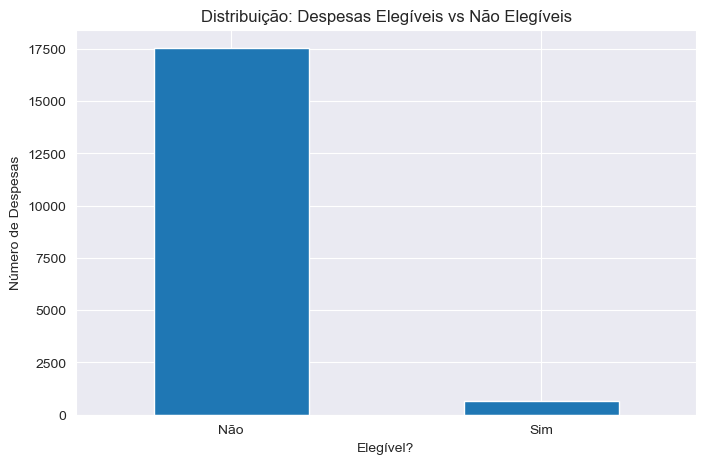

In [6]:
# Distribuição do target

target_counts = data['Elegível?'].value_counts()


plt.figure(figsize = (8,5))
target_counts.plot(kind='bar')
plt.title('Distribuição: Despesas Elegíveis vs Não Elegíveis')
plt.xlabel('Elegível?')
plt.ylabel('Número de Despesas')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.show()


In [25]:
target_counts

Elegível?
Não    17536
Sim      677
Name: count, dtype: int64

Nota-se claramente um **grande desbalanceamento de classes**, há que ter em atenção a métrica de avaliação (evitar accuracy e priorizar o **AUC**).